<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


# Project Title:  Boston Housing Data

#### Import the required libraries we need for the lab.


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

### Overview of Project Tasks

Final Project: For the project scenario, here is an overview of your tasks. The following reading sections will provide you with detailed instructions for each task.

Project Tasks:

Task 1: Familiarize yourself with the dataset 

Task 2: Generate basic statistics and visualizations for upper management. 

Task 3: Use the appropriate tests to answer the questions provided.



#### Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

#### Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

- For the "Median value of owner-occupied homes" provide a boxplot

- Provide a  bar plot for the Charles river variable

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

- Create a histogram for the pupil to teacher ratio variable

#### Task 3: Use the appropriate tests to answer the questions provided.
For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

1) State your hypothesis.

2) Use α = 0.05

3) Perform the test Statistics.

4) State the conclusion from the test.

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [45]:
# Data info
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CRIM       506 non-null    float64 
 1   ZN         506 non-null    float64 
 2   INDUS      506 non-null    float64 
 3   CHAS       506 non-null    float64 
 4   NOX        506 non-null    float64 
 5   RM         506 non-null    float64 
 6   AGE        506 non-null    float64 
 7   DIS        506 non-null    float64 
 8   RAD        506 non-null    float64 
 9   TAX        506 non-null    float64 
 10  PTRATIO    506 non-null    float64 
 11  LSTAT      506 non-null    float64 
 12  MEDV       506 non-null    float64 
 13  Age_Group  506 non-null    category
dtypes: category(1), float64(13)
memory usage: 52.1 KB


In [47]:
# Statistical Describe 

boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
# Drop the unnamed index column if it exists
if 'Unnamed: 0' in boston_df.columns:
    boston_df = boston_df.drop('Unnamed: 0', axis=1)

# Set a consistent style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(18, 15))

<Figure size 1800x1500 with 0 Axes>

<Figure size 1800x1500 with 0 Axes>

## Task 2: Generate Descriptive Statistics and Visualizations 

### For the "Median value of owner-occupied homes" provide a boxplot 

Text(0, 0.5, "Median Value (in $1000's)")

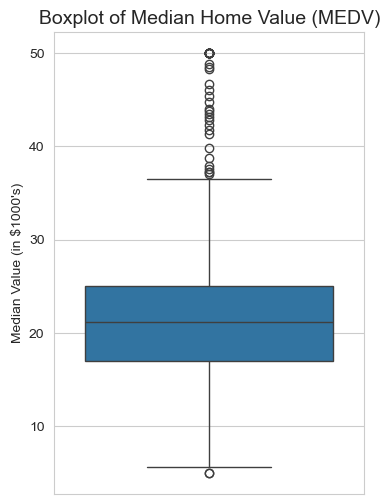

In [34]:

plt.figure(figsize=(4, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Home Value (MEDV)', fontsize=14)
plt.ylabel('Median Value (in $1000\'s)')

### Provide a  bar plot for the Charles river variable

Text(0, 0.5, 'Count of Properties')

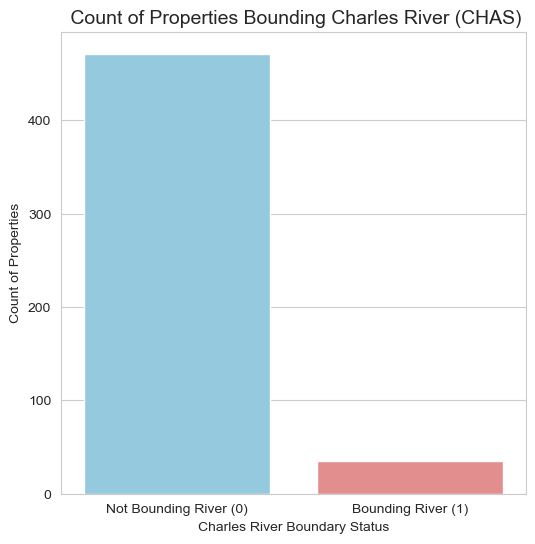

In [20]:
plt.figure(figsize=(6, 6))
chas_counts = boston_df['CHAS'].value_counts()
chas_counts.index = ['Not Bounding River (0)', 'Bounding River (1)']
sns.barplot(x=chas_counts.index, y=chas_counts.values, hue=chas_counts.index, palette=['skyblue', 'lightcoral'], legend=False)
plt.title(' Count of Properties Bounding Charles River (CHAS)', fontsize=14)
plt.xlabel('Charles River Boundary Status')
plt.ylabel('Count of Properties')

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [23]:
# Define age groups
bins = [-np.inf, 35, 70, np.inf]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

([0, 1, 2],
 [Text(0, 0, '35 years and younger'),
  Text(1, 0, 'between 35 and 70 years'),
  Text(2, 0, '70 years and older')])

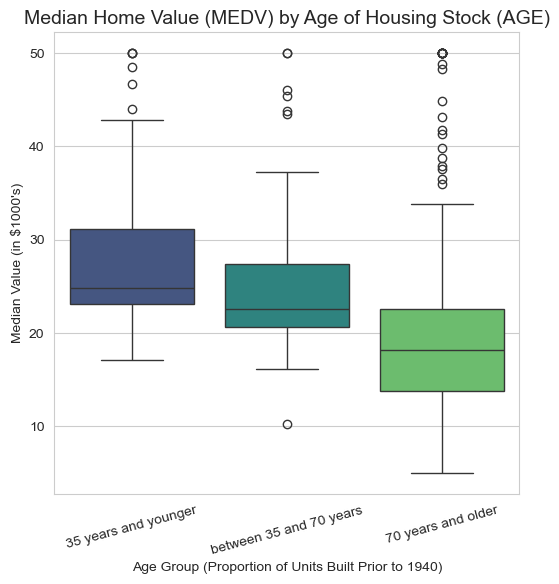

In [27]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Age_Group', y='MEDV', hue='Age_Group', data=boston_df, order=labels, palette='viridis', legend=False)
plt.title('Median Home Value (MEDV) by Age of Housing Stock (AGE)', fontsize=14)
plt.xlabel('Age Group (Proportion of Units Built Prior to 1940)')
plt.ylabel('Median Value (in $1000\'s)')
plt.xticks(rotation=15)

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship? 


Relationship between NOX and INDUS (Correlation): 0.764
Interpretation: A positive correlation suggests that areas with higher industrial activity (INDUS) tend to have higher nitric oxide concentrations (NOX).


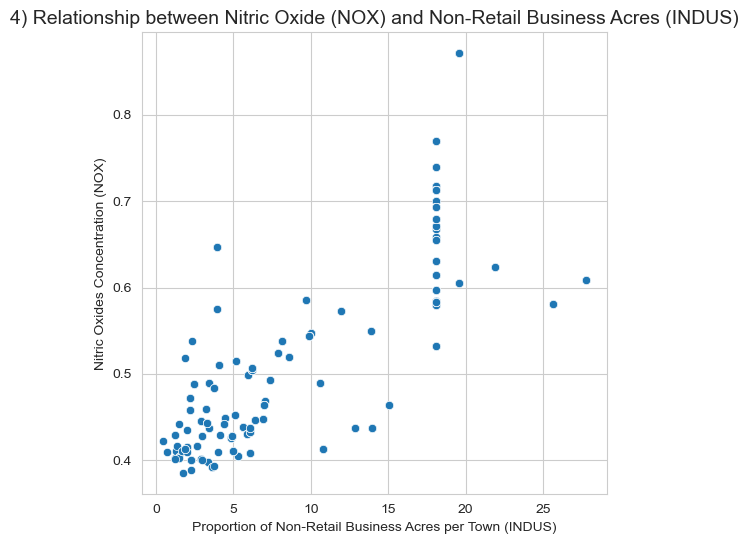

In [31]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('4) Relationship between Nitric Oxide (NOX) and Non-Retail Business Acres (INDUS)', fontsize=14)
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxides Concentration (NOX)')

# Calculate correlation for explanation (as requested in the original task)
correlation_nox_indus = boston_df['NOX'].corr(boston_df['INDUS'])
print(f"\nRelationship between NOX and INDUS (Correlation): {correlation_nox_indus:.3f}")
print("Interpretation: A positive correlation suggests that areas with higher industrial activity (INDUS) tend to have higher nitric oxide concentrations (NOX).")

### Create a histogram for the pupil to teacher ratio variable 

Text(0, 0.5, 'Frequency')

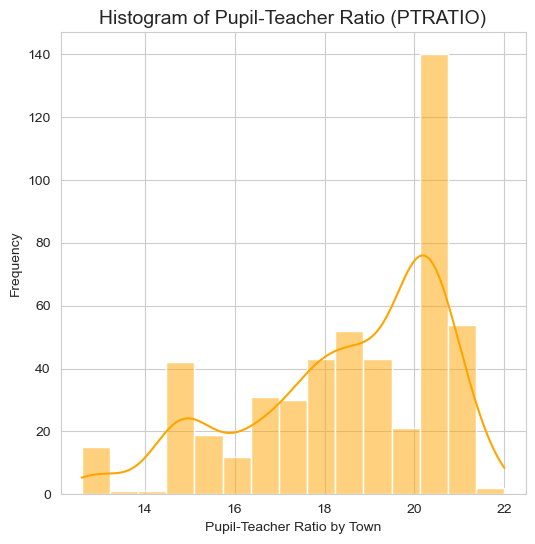

In [33]:
plt.figure(figsize=(6,6))
sns.histplot(boston_df['PTRATIO'], kde=True, bins=15, color='orange')
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)', fontsize=14)
plt.xlabel('Pupil-Teacher Ratio by Town')
plt.ylabel('Frequency')

### 

## Task 3: Use the appropriate tests to answer the questions provided. 

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

 

In [37]:
# Set the significance level
alpha = 0.05

# Hypothesis: H0: mu_CHAS0 = mu_CHAS1, Ha: mu_CHAS0 != mu_CHAS1
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
# Use Welch's T-test (equal_var=False) as a safer default
t_stat_ttest, p_value_ttest = stats.ttest_ind(chas_0, chas_1, equal_var=False)

print(f"\n1. T-Test (CHAS vs MEDV): T-statistic={t_stat_ttest:.3f}, P-value={p_value_ttest:.4f}")
ttest_conclusion = "Reject H0 (Significant difference)" if p_value_ttest < alpha else "Fail to Reject H0 (No significant difference)"
print(f"   Conclusion: {ttest_conclusion}")


1. T-Test (CHAS vs MEDV): T-statistic=-3.113, P-value=0.0036
   Conclusion: Reject H0 (Significant difference)


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA) 

In [39]:
# Set the significance level
alpha = 0.05

# Hypothesis: H0: mu_young = mu_mid = mu_old, Ha: At least one mean is different
# Discretize AGE into three groups
bins = [-np.inf, 35, 70, np.inf]
labels = ['35 and younger', '35 to 70', '70 and older']
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Get the MEDV values for each group
group_young = boston_df[boston_df['Age_Group'] == '35 and younger']['MEDV']
group_mid = boston_df[boston_df['Age_Group'] == '35 to 70']['MEDV']
group_old = boston_df[boston_df['Age_Group'] == '70 and older']['MEDV']

# Perform ANOVA
f_stat_anova, p_value_anova = stats.f_oneway(group_young, group_mid, group_old)

print(f"\n2. ANOVA (Age Groups vs MEDV): F-statistic={f_stat_anova:.3f}, P-value={p_value_anova:.4f}")
anova_conclusion = "Reject H0 (Significant difference)" if p_value_anova < alpha else "Fail to Reject H0 (No significant difference)"
print(f"   Conclusion: {anova_conclusion}")


2. ANOVA (Age Groups vs MEDV): F-statistic=36.408, P-value=0.0000
   Conclusion: Reject H0 (Significant difference)


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [42]:
# Set the significance level
alpha = 0.05

# Hypothesis: H0: rho = 0, Ha: rho != 0
corr_coeff_pearson, p_value_pearson = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"\n3. Pearson Correlation (NOX vs INDUS): Correlation={corr_coeff_pearson:.3f}, P-value={p_value_pearson:.4f}")
pearson_conclusion = "Reject H0 (Significant relationship exists)" if p_value_pearson < alpha else "Fail to Reject H0 (No significant relationship)"
print(f" Conclusion: {pearson_conclusion}")


3. Pearson Correlation (NOX vs INDUS): Correlation=0.764, P-value=0.0000
 Conclusion: Reject H0 (Significant relationship exists)


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [43]:
# Set the significance level
alpha = 0.05

# Objective: Quantify impact (beta_1 coefficient)
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) # Add a constant for the intercept

# Create and fit the model
model = sm.OLS(y, X).fit()

# Extract key statistics
dis_coefficient = model.params['DIS']
dis_p_value = model.pvalues['DIS']
r_squared_reg = model.rsquared

print(f"\n4. Regression (DIS on MEDV): DIS Coefficient={dis_coefficient:.3f}, DIS P-value={dis_p_value:.4f}")
print(f"   R-squared: {r_squared_reg:.3f}")

# State the impact
regression_impact = "Statistically significant positive impact (1 unit increase in DIS increases MEDV by $" + f"{dis_coefficient * 1000:,.0f}" + ")." if dis_p_value < alpha else "No statistically significant impact."
print(f"Impact: {regression_impact}")


4. Regression (DIS on MEDV): DIS Coefficient=1.092, DIS P-value=0.0000
   R-squared: 0.062
Impact: Statistically significant positive impact (1 unit increase in DIS increases MEDV by $1,092).
